# Project Description.

<b>Problem Statement :</b>
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.

<b>Objective :</b>
* We are required to model the data relating to the various customer attributes and their response towards the marketting campaigns, and report the key-drivers of those responses.
* The predictive model will be used to predict the response of a new customer towards a marketting campaign, in order to do targetted marketting which would lead to a better response-ratio for the compaigns and hence will cut down unnecessary costs.

<b>Data source :</b>

* Kaggle : https://www.kaggle.com/rodsaldanha/arketing-campaign

# Importing libraries
Okay so prima facie, lets import some of the libraries we will be needing for this project.
(even if we are missing out on some library, we can always import it later on in the project.)

In [1]:
import sys

# library to handle vectorized data 
import numpy as np 
# library for data analsysis and manupulation
import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 1000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading the data.

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep = ';')
print('The dimension of our data is :',data.shape)

The dimension of our data is : (2240, 29)


In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# let's have a look at the features and the corresponding data types of those features\n",
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exploratory data analysis and data cleaning.

### Feature : ' ID '

In [6]:
data['ID'].value_counts().index.sort_values(ascending=True)

Int64Index([    0,     1,     9,    13,    17,    20,    22,    24,    25,
               35,
            ...
            11133, 11148, 11166, 11171, 11176, 11178, 11181, 11187, 11188,
            11191],
           dtype='int64', length=2240)

Okay so we can see that the feature ID represents the customer IDs of the various customers over a period of time, but the data does not reflect a consecutive collection of data from all the customers, which is why the length of our data is no inline with the range of the customer IDs in this feature.  
Due to the fact mentoined above, the feature is distorting the data a bit, so we will be dropping the feature from our data as it is not adding any value to our data and hence not required for our analysis.

In [7]:
data.drop('ID', axis=1, inplace=True)

### Feature : ' Year_Birth '

In [8]:
data['Year_Birth'].value_counts().index.sort_values(ascending=True)

Int64Index([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
            1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996],
           dtype='int64')

Okay so from above we can observe the the feature 'Year_Birth' represents the different years of birth of the customers. The data collected contains some gaps in this feature; in terms of particular years in which customers were born. So our data does not contain all the years starting from 1893 to 1996.

### Feature : ' Education '

In [9]:
data['Education'].value_counts().index.sort_values(ascending=True)

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object')

We can see that there are  classes in this feature, but there are 2 among them which mean the same but are represented in two different ways; i.e. '2n Cycle' and 'Master'. So we will replace all occurances of he class'2n Cycle' with 'Master', for a better value representation.

In [10]:
data['Education'] = data["Education"].replace('2n Cycle', "Master")

### Feature : ' Marital_Status '

In [11]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

okay so this feature has 8 classes inour data, for the purpose of a better value representation in this feature, we will be doing the following transformations to some of the classes :
* 'Together' > replaced by 'live_in',
* 'Alone', 'YOLO' and 'Absurd' > replaced by 'single' .

In [12]:
data['Marital_Status'] = data['Marital_Status'].replace('Together', 'Live_in')
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

### Feature : ' Dt_Customer '

In [13]:
data['Dt_Customer'].value_counts().index.sort_values(ascending=True)

Index(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03',
       '2012-08-04', '2012-08-05', '2012-08-06', '2012-08-07', '2012-08-08',
       ...
       '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
       '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29'],
      dtype='object', length=663)

The feature Dt_Customer represents dates of customer’s enrolment with the company. The data in this feature is represented in type str. In order to improve the value representation of this feture, and to do meaningful feature engineering with this feature, we will be converting the values in this feaure to data type datetime.

In [14]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%Y-%m-%d")

In [15]:
data['Dt_Customer'].value_counts().index.sort_values(ascending=True)

DatetimeIndex(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02',
               '2012-08-03', '2012-08-04', '2012-08-05', '2012-08-06',
               '2012-08-07', '2012-08-08',
               ...
               '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-28', '2014-06-29'],
              dtype='datetime64[ns]', length=663, freq=None)

As we can see that the data type has been converted into datetime64[ns], without effecting the data itself.

# Descriptive analysis.

In [16]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


As we can see from above the numerical features are on very different scales with respect to each other, this tells us that we will need to scale the numerical features in the future before using for modelling the data.

In [17]:
data.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,NaN,NaN,0.117372


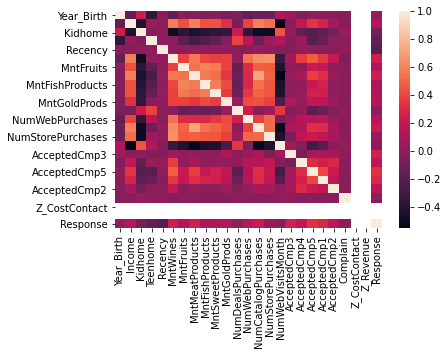

In [18]:
# Visualization of the correlation between the features.
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

We can see from above that a lot of values in the heat map representing the correlations between the features are null values (excluding the diagonal values); this is due to the presence of imbalanced data in some of the features in our data which basically leads to 0 variance, resulting in a null value for correlation with those features.  
The features with imbalanced features wll be handled in the later stage of the modelling.

# Handling missing-values.

In [19]:
# Let's check for missing values in our data
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

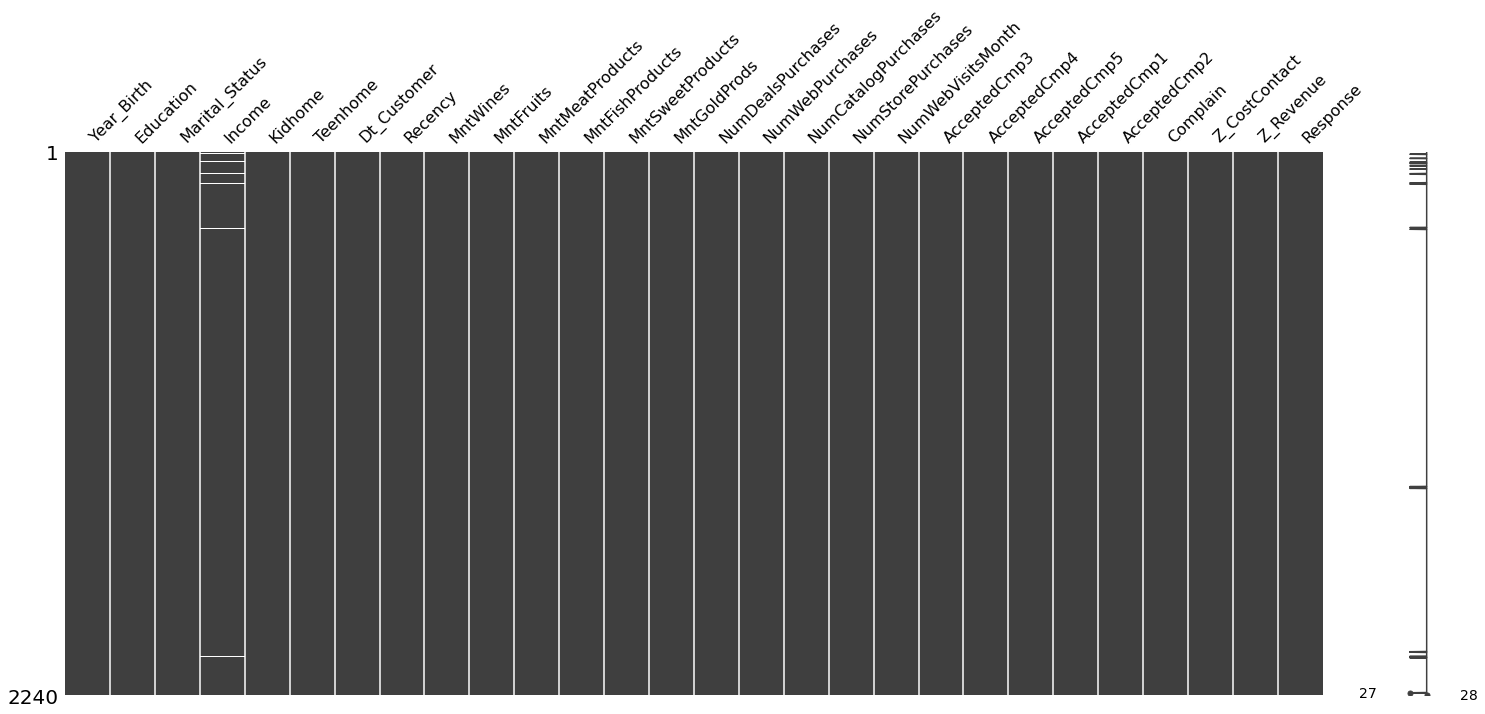

In [20]:
# Let's visualize the fragmentation of the data feature-wise due to the presence of the missing values.
import missingno as msno
msno.matrix(data)

We can see that the data is fairly oh high quality due to the fact that very less number of missing values are present in the data.  
Given that, we do see 24 missing values in the feature 'Income'. The best ways to impute the missing values in this feature, is strategies which utilise relative imputation strategies.  
For exampe we can use the mode of the feature for imputation purposes of the missing values in this feature if we assume that the data is a high degree representation of the bigger population, which means that any new data point will be in line with the distribution of the data we have.  
Otherwise, we can use the **sklearn.impute.KNNImputer** for imputation purposes of the missing values in this feature, which utilises the K-nearest-neighbors algorithm to figure out the value with highest probality, and uses it for imputation.  
Because of the fact we cannot be sure of how representative our data is of the larger population, we will be using KNNImputer in this case.

In [21]:
# let's check the range of the feature Income
data['Income'].max() - data['Income'].min()

664936.0

In [22]:
from sklearn.impute import KNNImputer
data['Income'] = KNNImputer(n_neighbors=4).fit_transform(data['Income'].values.reshape(-1,1))

In [23]:
data['Income'].isnull().sum()

0

# Outliers detection and removal.

Removing the following features :
* categorical feature with only one class
* feature with only a singular value

In [24]:
# filtering the features with only one class or singular value
for col in data.columns :
    if len(data[col].value_counts()) == 1 :
        print(data[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


As we can see there are two features in our dataset have constant values, hence dropping them.

In [25]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [26]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Let's explore the features with binary categorical classes to check for imbalanced data.

In [27]:
# filtering the features with binary classes to check for presence of imbalanced data 
for col in data.columns :
    if len(data[col].value_counts()) == 2 :
        print(data[col].value_counts())

0    2077
1     163
Name: AcceptedCmp3, dtype: int64
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
0    2077
1     163
Name: AcceptedCmp5, dtype: int64
0    2096
1     144
Name: AcceptedCmp1, dtype: int64
0    2210
1      30
Name: AcceptedCmp2, dtype: int64
0    2219
1      21
Name: Complain, dtype: int64
0    1906
1     334
Name: Response, dtype: int64


As we can see from above, the feature 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', and 'Response', are binary categorical features with imbalanced data.  
In order to prevent false outlier detection of the minority classes in the above mentioned features, we will be excluding them from the outlier detection and removal step.
And in order to prevent majority class prediction by the classification algorithms, we will be handling the above features to balance the frequency of the binary classes later in the process.

 Mean and standard deviation of the features, before removing outliers, for aiding the analysis of the presence and absence of outliers in our data.

In [28]:
outliers_effect = pd.DataFrame(data.describe().iloc[1:3, :]).rename(index={'mean':'initial_mean', 'std':'initial_SD'})
outliers_effect = outliers_effect.T
outliers_effect

,initial_mean,initial_SD
Year_Birth,1968.805804,11.984069
Income,52247.251354,25037.797168
Kidhome,0.444196,0.538398
Teenhome,0.506250,0.544538
Recency,49.109375,28.962453
MntWines,303.935714,336.597393
MntFruits,26.302232,39.773434
MntMeatProducts,166.950000,225.715373
MntFishProducts,37.525446,54.628979
MntSweetProducts,27.062946,41.280498


Outlier detection using Local Outlier Factor.

In [29]:
# filtering the features to apply outlier detection and removal step. 
col_to_exclude = []
'''
Filtering the features with binary classes to exclude from outlier detection and removal step.
The reason we can use a simple filter like this is,
due to the fact that we know this filter screens out all the desired features,
as already demonstrated above.
'''
for col in data.columns :
    if len(data[col].value_counts()) == 2 :    
        col_to_exclude.append(col)
col_to_include = (data.select_dtypes(include=['float64', 'int64'])).drop(col_to_exclude, axis=1).columns
col_to_include

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

Let's figure out the optimum number of neghbors for the LocalOutlierFactor, for our dataset.

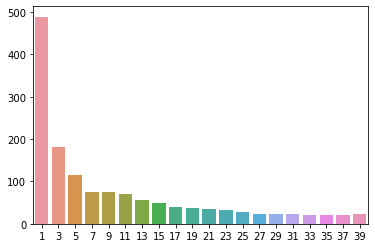

In [30]:
from sklearn.neighbors import LocalOutlierFactor
# we are taking a range of odd numbers, because of the use of 'VOTING' n the algorithm.
neighbors_LOF = np.arange(1, 40, 2)
num_outliers = []
for n in neighbors_LOF :
    outlier_detector = LocalOutlierFactor(n_neighbors = n)
    outliers = pd.Series(outlier_detector.fit_predict(data[col_to_include]))
    num_outliers.append(outliers.value_counts()[-1])
    
sns.barplot(x = neighbors_LOF, y = num_outliers)

As we can see from above that, the number of outliers detected by the LOF algorithm decreases as we increase the number of neighbor, which is inline with our expectations.  
From above we can clearly see that, the 21 nearest neighbor is the optimum numner of neighbors to detect outliers in this dataset, because number of nearest neighbors more than 21 is not bringing ay significant resuts.  

In [31]:
final_outlier_detector = LocalOutlierFactor(n_neighbors = 21)
outliers = pd.Series(final_outlier_detector.fit_predict(data[col_to_include]))
print('The number of outliers detected by LOF are > ',outliers.value_counts()[-1])

The number of outliers detected by LOF are >  34


In [32]:
outliers_indices = [ x for x in range(len(outliers)) if outliers[x] == -1]
data.drop(data.index[outliers_indices], inplace = True)
print('The dimension of the data after removing outliers is', data.shape)

The dimension of the data after removing outliers is (2206, 26)


We can see the effect of removing the outliers from our data in terms of the mean and SD of the features before and after removal of the outliers.

In [33]:
outliers_effect["mean_after_outlier_removal"] = data.describe().iloc[1,:]
outliers_effect["SD_after_outlier_removal"] = data.describe().iloc[2,:]
outliers_effect

,initial_mean,initial_SD,mean_after_outlier_removal,SD_after_outlier_removal
Year_Birth,1968.805804,11.984069,1968.779238,11.991560
Income,52247.251354,25037.797168,51552.570956,20332.490622
Kidhome,0.444196,0.538398,0.447869,0.539381
Teenhome,0.506250,0.544538,0.511786,0.545105
Recency,49.109375,28.962453,49.139166,29.014644
MntWines,303.935714,336.597393,301.420671,332.852938
MntFruits,26.302232,39.773434,26.374887,39.775794
MntMeatProducts,166.950000,225.715373,163.481414,214.059526
MntFishProducts,37.525446,54.628979,37.674977,54.694949
MntSweetProducts,27.062946,41.280498,26.753853,40.416838


# Feature engineering.

Creating the feature 'Customer_age' from the feature 'Year_birth'

In [34]:
# calculating age as it is in the year 2020
data['Customer_age'] = 2020 - data['Year_Birth']
# dropping the 'year_Birth' feature from the data as it is now redundant
data.drop('Year_Birth', axis=1, inplace=True)
data['Customer_age'].head()

0    63
1    66
2    55
3    36
4    39
Name: Customer_age, dtype: int64

Further exploring the feature 'Customer_age'.

In [35]:
data['Customer_age'].value_counts().index.sort_values(ascending = True)

Int64Index([ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
             37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
             50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
             63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
             76,  77,  79,  80, 120, 121, 127],
           dtype='int64')

Okay so we can see that age of the customers in our dataset is ranging from 25 years to 80 years old. That gives us a range of 55 years of age gap between our youngest and oldest targeted customer.  
In order to improve the signal-noise ratio in our data, we will be further discretizing this feature into 11 bins, where each bin would represent a range of 5 years. 

In [36]:
data['Customer_age'] = pd.cut(data['Customer_age'], bins=11, labels=False, include_lowest=True)

The feature 'Kidhome' represents the number of small children in customer’s household.  
And the feature 'Teenhome' represents the number of teenagers in customer’s household.  
Creating the feature 'n_kids' from the above two features, and transformig the above two feature into percentage of the new feature 'n_kids'.

In [37]:
data['n_kids'] = data['Kidhome'] + data['Teenhome'] 
data['Kidhome'] = (data['Kidhome']/data['n_kids'])*100
data['Teenhome'] = (data['Teenhome']/data['n_kids'])*100

In [38]:
data[['n_kids', 'Kidhome', 'Teenhome']].head()

,n_kids,Kidhome,Teenhome
0,0,NaN,NaN
1,2,50.0,50.0
2,0,NaN,NaN
3,1,100.0,0.0
4,1,100.0,0.0


We can see that there are null-values in the transformed features 'Kidhome' and Teenhome', this is due to the fact that there were 0 in that rows of that feature, whch is why after the transformation, it is showing as NaN.  
Hence we will be filling the NaN values in the feature 'Kidhome' and 'Teenhome' with 0,  which would also be inline with the true data.  

In [39]:
data['Kidhome'].fillna(0, inplace=True)
data['Teenhome'].fillna(0, inplace=True)

In [40]:
# renaming the feature 'Kidhome' and 'Teenhome'
data = data.rename(columns= {'Kidhome':'percent_kids', 'Teenhome':'percent_teenagers'})

In [41]:
data['percent_kids'].value_counts()

0.000000      1266
100.000000     514
50.000000      373
66.666667       31
33.333333       22
Name: percent_kids, dtype: int64

In [42]:
data['percent_teenagers'].value_counts()

0.000000      1129
100.000000     651
50.000000      373
33.333333       31
66.666667       22
Name: percent_teenagers, dtype: int64

In [43]:
# rounding up the values in percent_kids and percent_teenagers to 0 decimals.
data['percent_kids'] = data['percent_kids'].apply(lambda x: round(x, 0))
data['percent_teenagers'] = data['percent_teenagers'].apply(lambda x: round(x, 0))

The feature 'Dt_custome' represents the date of customer’s enrolment with the company.  
Creating new feature 'Days_with_company' representing the number of days the customer has been associated with the company, calculated from the customer's registration date with the company.

In [44]:
import datetime
from datetime import datetime, date

for i in range(0, len(data)):
    data['Days_with_company'] = datetime.today().date()-data['Dt_Customer'].dt.date

In [45]:
print(data['Days_with_company'].dtype)
data['Days_with_company'].head()

timedelta64[ns]


0   2929 days
1   2379 days
2   2578 days
3   2405 days
4   2427 days
Name: Days_with_company, dtype: timedelta64[ns]

We can see that in the value representation of the feature 'Days_with_company', the values have been represented in the data type timedelta64[ns], which is why we will be converting the values in the feature to integers, as doing so will not result in any kind of information loss, and in turn it will be a better value representation for the purposes of predictive modelling.

In [46]:
data['Days_with_company'] = data['Days_with_company'].apply(lambda x: int(x/np.timedelta64(1, 'D')))
data['Days_with_company'].dtype

dtype('int64')

In [47]:
# dopping the feature 'Dt_Customer' as it is not essential for our analysis
data.drop('Dt_Customer', axis=1, inplace=True)
data['Days_with_company'].head()

0    2929
1    2379
2    2578
3    2405
4    2427
Name: Days_with_company, dtype: int64

Further exploring the new feature 'Days_with_company'.

In [48]:
data['Days_with_company'].value_counts().index.sort_values(ascending=True)

Int64Index([2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275,
            ...
            2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965],
           dtype='int64', length=661)

We can see that the number of days the customers are associted with the company ranges from 2167 days to 2864 days, that is a range of 697 days.  
In order to improve the signal-noise ratio in the data we can further discreticize the feature based on the 4 quartiles.  
This would in turn also maintain balanced classes in the feature.  
Each bin representing the following : 
* bin 0 > legacy customer
* bin 1 > old customer
* bin 2 > new customer
* bin 3 > current customer

In [49]:
data['Days_with_company'] = pd.qcut(data['Days_with_company'], q=4, labels=False, precision=0)
data['Days_with_company'].value_counts()

0    553
2    552
1    551
3    550
Name: Days_with_company, dtype: int64

The feature 'Recency' represents the number of days since the last purchase, i.e. in other terms it shows the last activity in terms of a purchase.  
Creating new feature 'last_purchase_day_type', which will represent the type of day of the last purchase, i.e. 'Weekday' or 'Weekend'.

In [50]:
from datetime import timedelta

days_list = []
for val in data['Recency'].values :
     days_list.append((datetime.today().date() - timedelta(days=int(val))).strftime('%A'))
data['last_purchase_day_type'] = days_list
data['last_purchase_day_type'].head()

0    Wednesday
1      Tuesday
2       Sunday
3       Sunday
4      Tuesday
Name: last_purchase_day_type, dtype: object

In [51]:
data['last_purchase_day_type'] = data['last_purchase_day_type'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [52]:
data['last_purchase_day_type'].head()

0    Weekday
1    Weekday
2    Weekend
3    Weekend
4    Weekday
Name: last_purchase_day_type, dtype: object

The features 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'; represent the total amount spent on wine, fruits, meat, fish, sweet, gold products in the last 2 years respectively.  
Creating new feature 'Total_amnt_spent', representing the total amount spent by a customer in the last 2 years.  
And transforming the above mention original features to represent the percentage of money spent on those products with respect to the total amount spent, in the last 2 years.  

In [53]:
data['Tot_amnt_spent'] = (data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds'])

In [54]:
data['MntWines'] = round((data['MntWines']/data['Tot_amnt_spent'])*100, 2)
data['MntFruits'] = round((data['MntFruits']/data['Tot_amnt_spent'])*100, 2)
data['MntMeatProducts'] = round((data['MntMeatProducts']/data['Tot_amnt_spent'])*100, 2)
data['MntFishProducts'] = round((data['MntFishProducts']/data['Tot_amnt_spent'])*100, 2)
data['MntSweetProducts'] = round((data['MntSweetProducts']/data['Tot_amnt_spent'])*100, 2)
data['MntGoldProds'] = round((data['MntGoldProds']/data['Tot_amnt_spent'])*100, 2)

In [55]:
data['Income'].value_counts().index.sort_values(ascending=True)

Float64Index([ 4023.0,  4428.0,  4861.0,  5305.0,  5648.0,  6560.0,  6835.0,
               7144.0,  7500.0,  8028.0,
              ...
              93027.0, 93404.0, 93790.0, 94384.0, 94472.0, 94642.0, 94871.0,
              95169.0, 95529.0, 96547.0],
             dtype='float64', length=1944)

As we can see from above that monthly income of the customers in our dataset range from 3502 (minimum) to 162397 (maximum).  
In order to improve the signal-noise ratio of our data we will be discretizing the feature into 5 bins according to the quantiles of the feature, where each bin represents the following :  
* bin 0 > represents low income
* bin 1 > represents below average income
* bin 2 > represents average income
* bin 3 > represents above average income
* bin 4 > represents high income

Using the quantiles to discretize the feature would also make sure that the discrete bins are of fairly same count, hence maintaining a balanced feruency of the discrete classes in the feature.

In [56]:
data['Income'] = pd.qcut(data['Income'], q=5, labels=False, precision=0)
data['Income'].value_counts()

0    442
3    441
1    441
4    441
2    441
Name: Income, dtype: int64

# Data analysis utilising visualizations.

Visualization of Education and Income with Response of the customers.

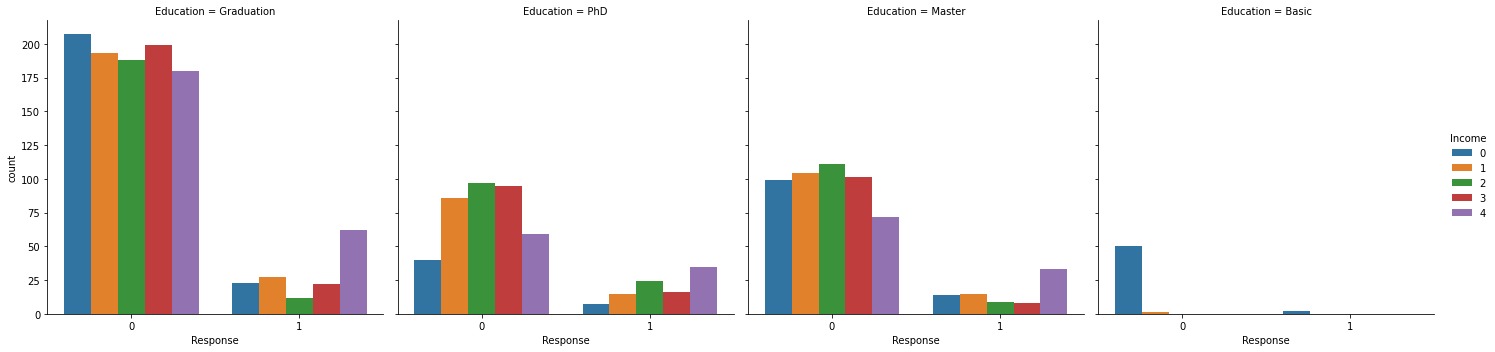

In [57]:
sns.catplot(x='Response', hue='Income', col='Education', data=data, kind='count')

Observation : 
* customers who have a education level of 'Graduation' show the highest rejection levels to the last campaign, where the effect of 'Income' was insignificant towards the kind of response.
* customers who have a educational background of 'PhD' and 'Master', show approximately similar levels of rejection towards the last campaign. 
* Among the customers having a 'PhD', we can see the lowest levels of rejection response towards the last campaign is being showed by the customers having a low income, and the level of rejection responses gradually grows as the income levels increase peaking at the customers with above average income and then a slight decrease of rejection levels by customers with high income.
* The level of the customer's income is insignificant towards their levels of a rejection response, for the customers having a 'Master' in education.
* Fr the customers with a 'Basic' educational background we can see tht the rejection levels are reletively lower than for customers with other educational backgrounds; but within these class of customers, the ones having a low level of income show significantly higher level of a rejection response towards the last campaign.

Visualizatoin of Marital_Status and n_kids with Response.

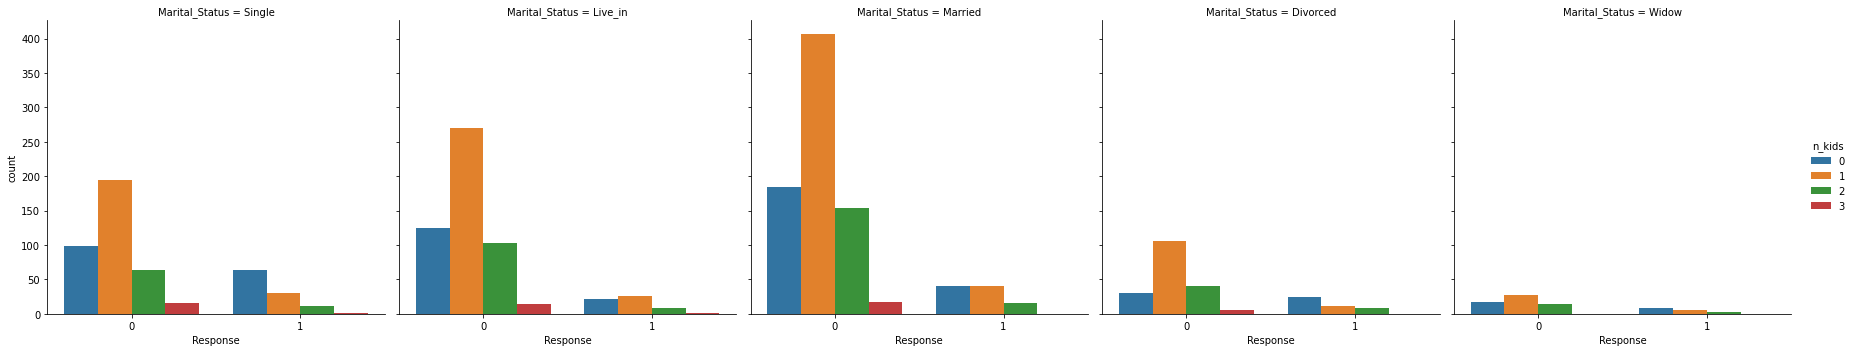

In [58]:
sns.catplot(x='Response', hue='n_kids', col='Marital_Status', data=data, kind='count')

Observtions : 
* We can clearly see that a majority of the rejection responses towards the last campaign is from customers who are married, followed by customers who are in a live-in relationship and who are single.
* We can also see a clear pattern, that customers having 1 kid irrespective of their maritl status, show the relatively highest rejection responses across the population.

Visualization of Customer_age, Days_with_company and Response.

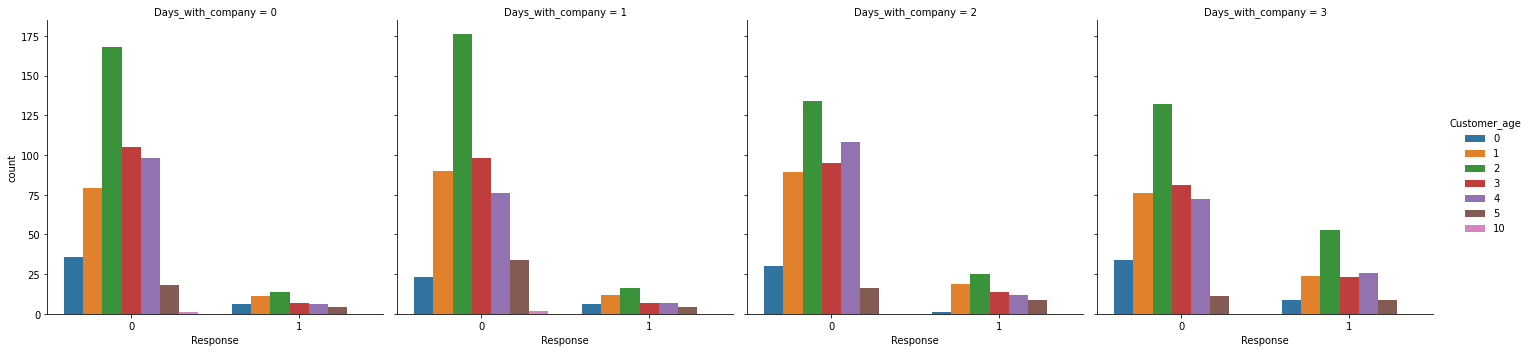

In [59]:
sns.catplot(x='Response', hue='Customer_age', col='Days_with_company', data=data, kind='count')

Observations :
* We can see a similar level of  relatively higher rejection responses from customers who are legecy and old customers.
* We can also see a similar level of relatively lower but independently higher, rejection levels from new and current customers.
* A common pttern among all kinds of customers is that the highest levels of rejection responses are shown by the cutomers in the age bin of 3 to 7.


Visualization of percent_kids, percent_teenager with Response.

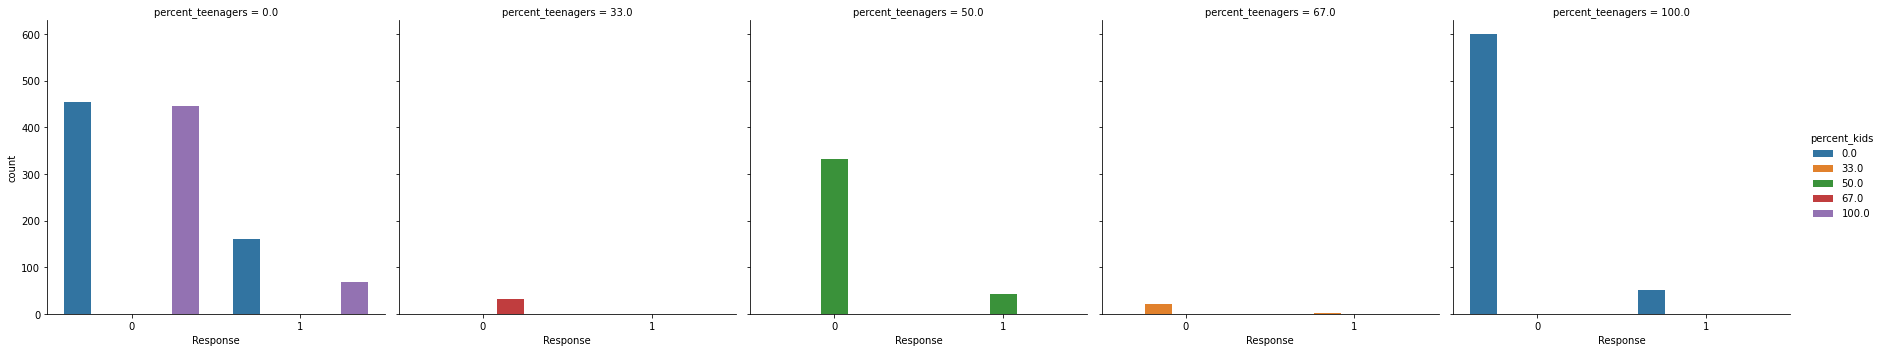

In [60]:
sns.catplot(x='Response', hue='percent_kids', col='percent_teenagers', data=data, kind='count')

Observations : 
* We can see high levels of rejection responses from customers :
    * having 0 teenagers or kids
    * having only kids and o teenagers
    * having equally kids and teenagers
    * having only teenagers
* On the contrary, customers with 70% kids and 30% teenagers are showing lower rejection responses towards the last campaign.
* To summarize the above observations, customers with all kinds of combinations of kids and teenagers (except 30-70 ratio) in their family show similarly high rejection responses.

Visualization of NumDealsPurchases, NumWebPurchases with Response.

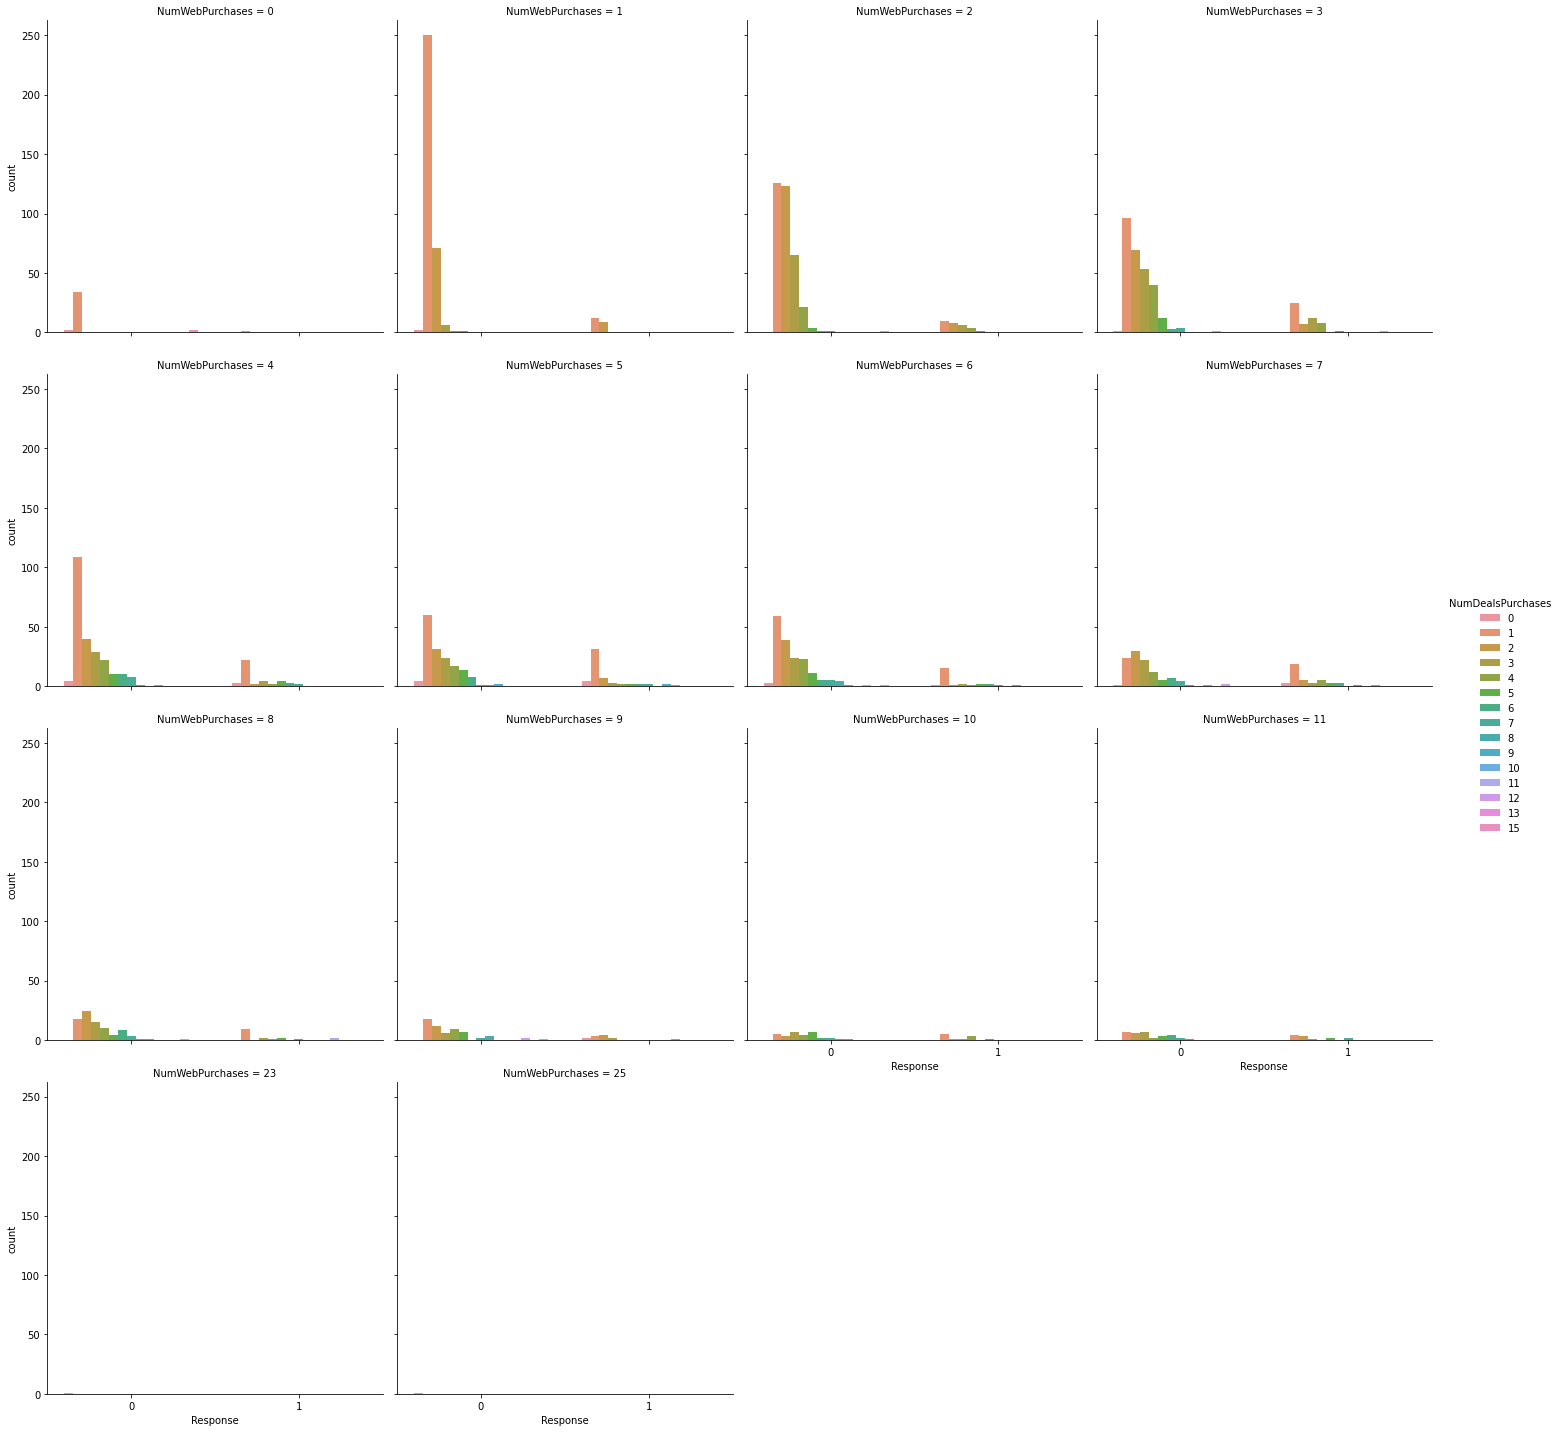

In [61]:
sns.catplot(x='Response', hue='NumDealsPurchases', col='NumWebPurchases', data=data, kind='count', legend_out = True, col_wrap=4)

We can observe from above that there is a high level of rejection responses from customers belonging to the type : 
* customers who did 1 to 4 purchases from the company website
    * and customers who did 1 to 4 purchases with discount deals.

Visualization of NumCatalogPurchases, NumStorePurchases with Response.

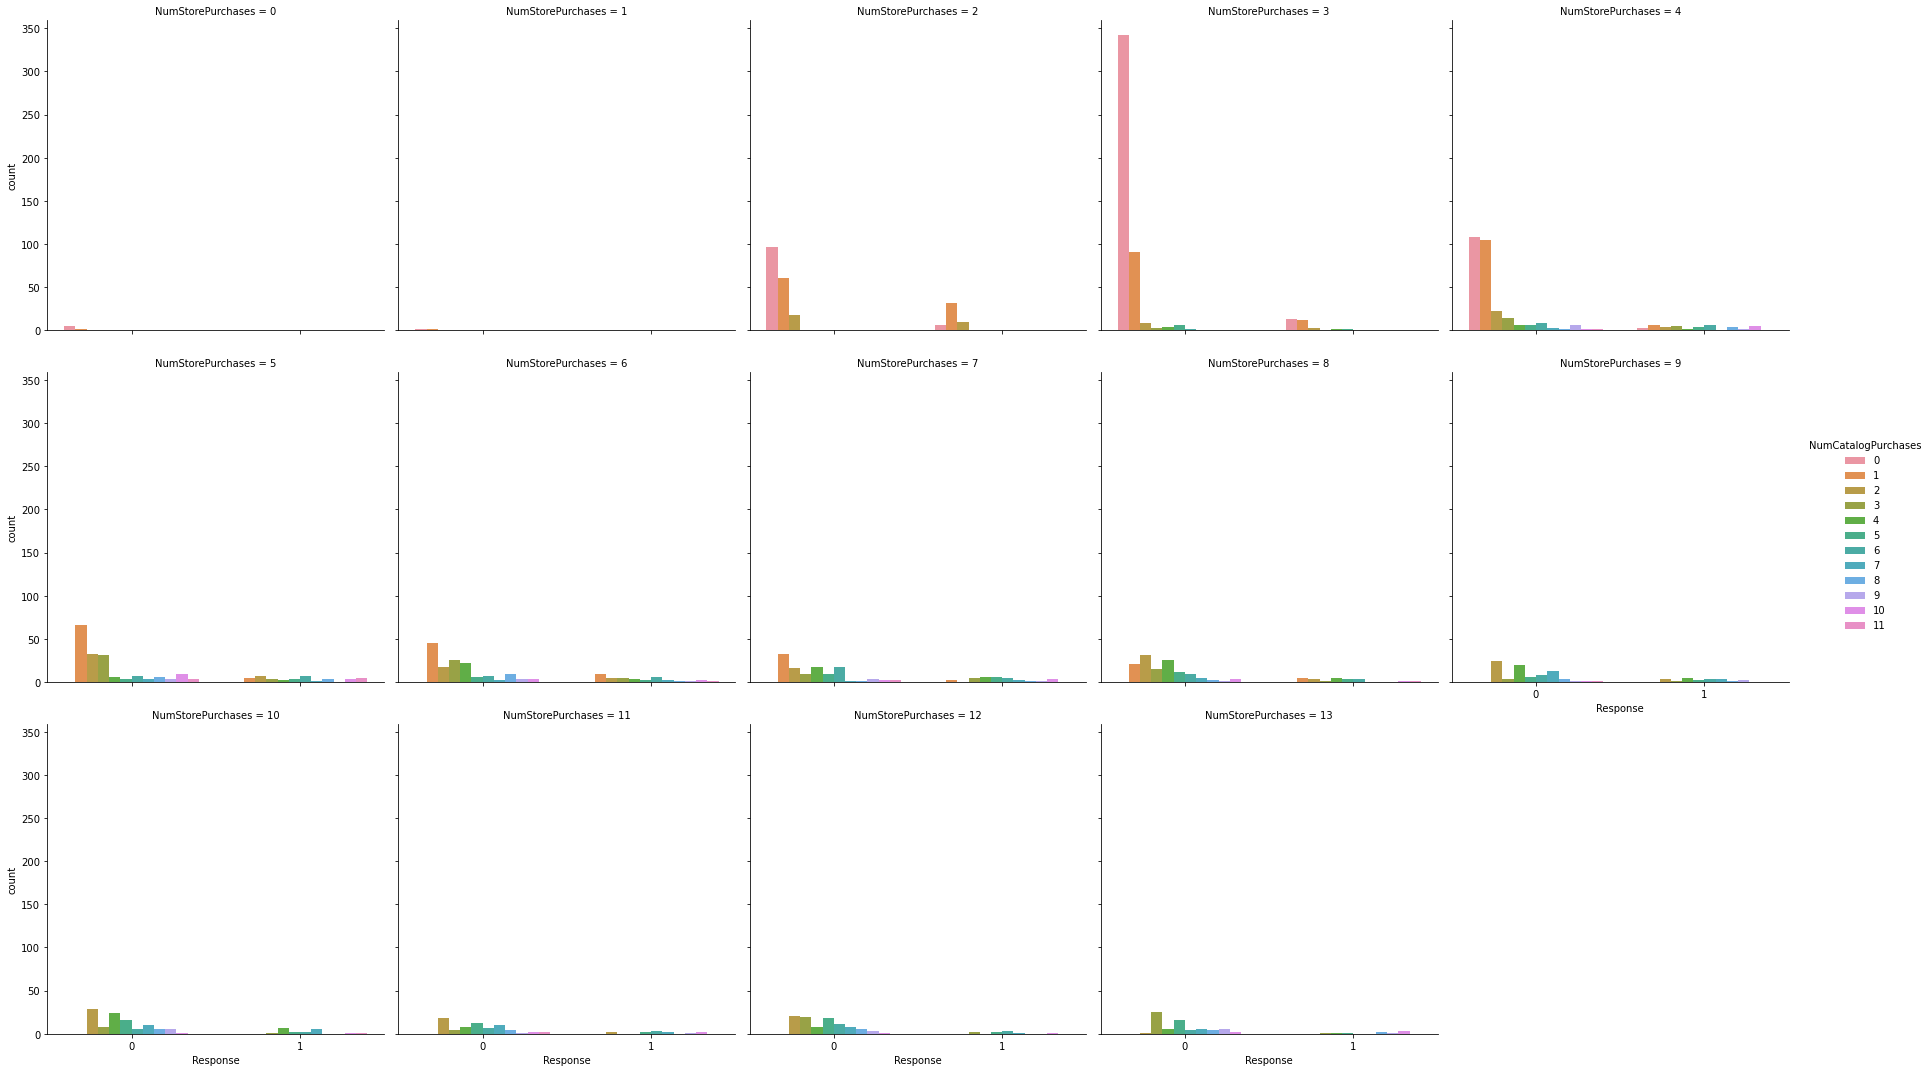

In [62]:
sns.catplot(x='Response', hue='NumCatalogPurchases', col='NumStorePurchases', data=data, kind='count', legend_out=True, col_wrap=5)

We can see from above that there is a high level of rejection responses coming from customers who did 2 to 4 purchases directly from the stores and among them the customers who did 1 to 3 purchases from the catalog, are showing relatively higher rejection responses.

Visualization of NumWebVisitsMonth, last_purchase_day_type with Response.

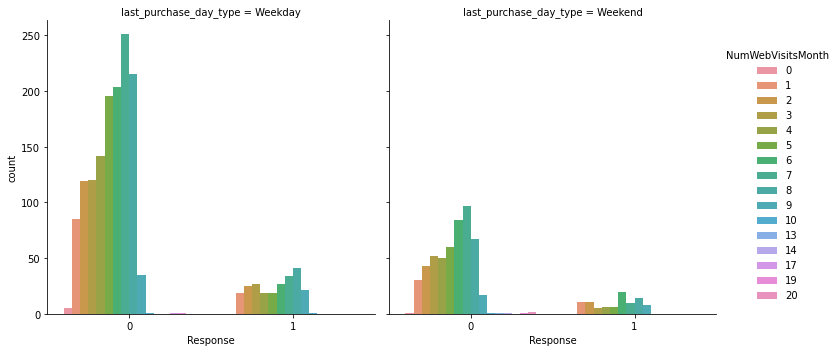

In [63]:
sns.catplot(x='Response', hue='NumWebVisitsMonth', col='last_purchase_day_type', data=data, kind='count')

We can see fromabove tat the customers who were visiting the website from 1 to 8 times a month on a weekday, are showing the relatively highest rejection responses; and the same apples for weekends but the magnitude of the rejection responses are relatively lower than on the weendays.

Visualization of AcceptedCmp1, Complain with Response.

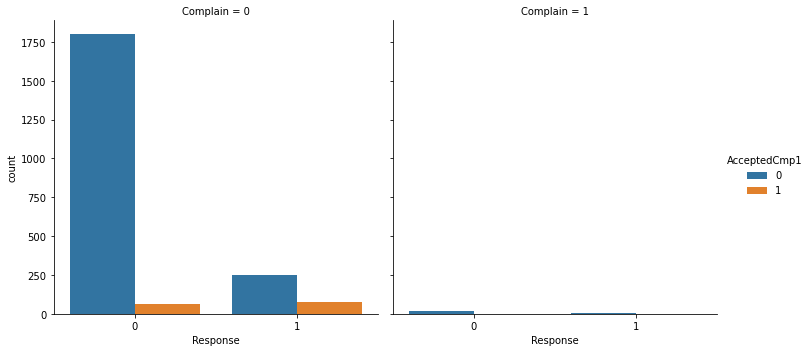

In [64]:
sns.catplot(x='Response', hue='AcceptedCmp1', col='Complain', data=data, kind='count')

We can observe from above that, customers who do not complain are showing a higher level of rejection responses.

Visualization of AcceptedCmp2, Complain with Response.

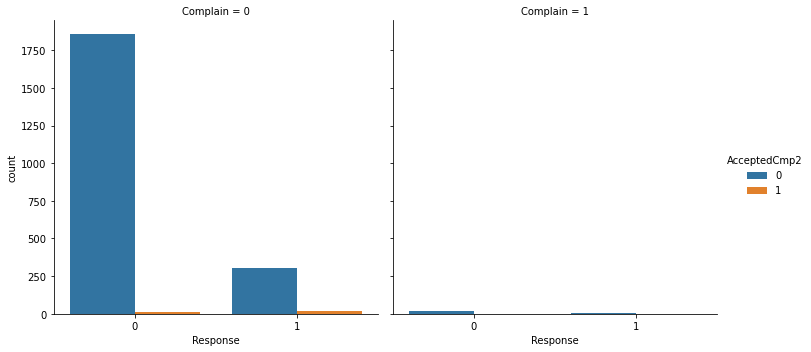

In [65]:
sns.catplot(x='Response', hue='AcceptedCmp2', col='Complain', data=data, kind='count')

We can observe from above that, customers who do not complain are showing a higher level of rejection responses.

Visualization of AcceptedCmp3, Complain with Response.

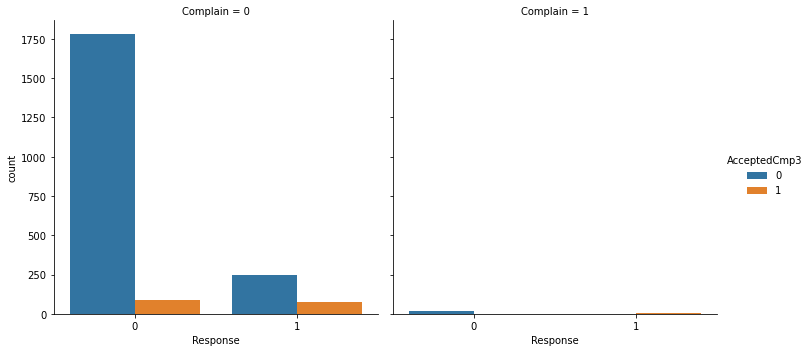

In [66]:
sns.catplot(x='Response', hue='AcceptedCmp3', col='Complain', data=data, kind='count')

We can observe from above that, customers who do not complain are showing a higher level of rejection responses.

Visualization of AcceptedCmp4, Complain with Response.

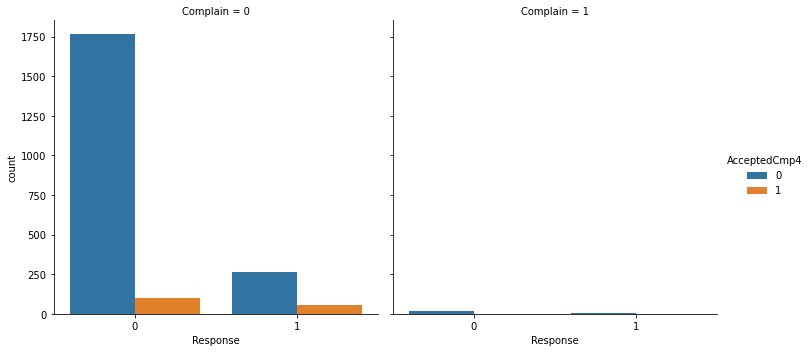

In [67]:
sns.catplot(x='Response', hue='AcceptedCmp4', col='Complain', data=data, kind='count')

We can observe from above that, customers who do not complain are showing a higher level of rejection responses, but they ae also showing a relatively lower but globally higher levels of acceptance responses to the campaign.

Visualization of AcceptedCmp5, Complain with Response.

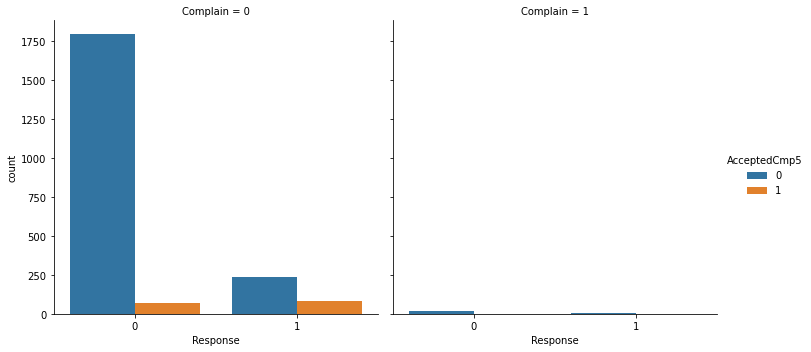

In [68]:
sns.catplot(x='Response', hue='AcceptedCmp5', col='Complain', data=data, kind='count')

We can observe from above that, customers who do not complain are showing a higher level of rejection responses, but they ae also showing a relatively lower but globally higher levels of acceptance responses to the campaign.

# Feature encoding.

In [69]:
# one hot encoding the nominal categorical feature 'last_purchase_day_type'
enc_feature_df = pd.get_dummies(data['last_purchase_day_type'],prefix='last_purchase_day_type', prefix_sep='_')
data = pd.concat([enc_feature_df,data], axis=1)
data.drop('last_purchase_day_type', axis=1, inplace=True)

# label encoding
# importing required libraies
from sklearn.preprocessing import LabelEncoder
data['Education'] = LabelEncoder().fit_transform(data['Education'].values.reshape(-1,1))
data['Marital_Status'] = LabelEncoder().fit_transform(data['Marital_Status'].values.reshape(-1,1))

/home/titashmkhrj/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Making the feature and target space.

In [70]:
# making our x and y data
x_data = data.drop('Response', axis=1)
y_data = data['Response']

#saving the above as csv files
x_data.to_csv('feature_space.csv')
y_data.to_csv('target_space.csv')